# AutoGluon - Predicción de ventas (tn) por producto para febrero 2019

Instalación Autogluon

In [51]:
%pip install autogluon.timeseries

Note: you may need to restart the kernel to use updated packages.


In [52]:
## 1. Importar librerías necesarias
import pandas as pd
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np




In [53]:
## 2. Cargar datasets
df_sellin = pd.read_csv("sell-in.txt", sep="\t")
df_productos = pd.read_csv("tb_productos.txt", sep="\t")

In [54]:
# Leer lista de productos a predecir
with open("product_id_apredecir201912.TXT", "r") as f:
    product_ids = [int(line.strip()) for line in f if line.strip().isdigit()]

In [55]:
## 3. Preprocesamiento
# Convertir periodo a datetime
df_sellin['timestamp'] = pd.to_datetime(df_sellin['periodo'], format='%Y%m')

In [58]:
df_sellin.shape

(2945818, 8)

In [56]:
# Filtrar h productos requeridos
df_filtered = df_sellin[
    (df_sellin['product_id'].isin(product_ids))
]

In [57]:
df_filtered.shape

(2293481, 8)

In [59]:
# Agregar tn por periodo, cliente y producto
df_grouped = df_filtered.groupby(['timestamp', 'customer_id', 'product_id'], as_index=False)['tn'].sum()

In [60]:
df_grouped.shape

(2293481, 4)

In [ ]:
#df_grouped.to_csv("df_grouped.csv", index=False)

In [ ]:


# Paso 2: Crear un DataFrame con ventas de diciembre 2019 por producto
#ventas_dic_2019 = df_grouped[df_grouped['timestamp'] == pd.to_datetime('2019-12-01')]
#ventas_dic_2019 = ventas_dic_2019.groupby('product_id')['tn'].sum().reset_index()
#ventas_dic_2019.columns = ['product_id', 'tn_dic_2019']
#print("Ventas de diciembre 2019 por producto:", ventas_dic_2019[ventas_dic_2019['product_id'] == 20010])


In [61]:
# Paso 2: Crear un DataFrame solo con las  ventas de febrero 2019 por producto
ventas_feb_2019 = df_grouped[df_grouped['timestamp'] == pd.to_datetime('2019-02-01')]
ventas_feb_2019 = ventas_feb_2019.groupby('product_id')['tn'].sum().reset_index()
ventas_feb_2019.columns = ['product_id', 'tn_feb_2019']
print("Ventas de febrero 2019 por producto:", ventas_feb_2019[ventas_feb_2019['product_id'] == 20010])

Ventas de febrero 2019 por producto:    product_id  tn_feb_2019
9       20010    337.76009


In [62]:
# Listar los product_id distintos en ventas_feb_2019
ids_feb_2019 = ventas_feb_2019["product_id"].unique()
print(ids_feb_2019)
print(f"Cantidad de product_id distintos en ventas_feb_2019: {len(ids_feb_2019)}")

[20001 20002 20003 20004 20005 20006 20007 20008 20009 20010 20011 20012
 20013 20014 20015 20016 20017 20018 20019 20020 20021 20022 20023 20024
 20025 20026 20027 20028 20029 20030 20031 20032 20033 20035 20037 20038
 20039 20041 20042 20043 20044 20045 20046 20047 20049 20050 20051 20052
 20053 20054 20055 20056 20057 20058 20059 20061 20062 20063 20065 20066
 20067 20068 20069 20070 20071 20072 20073 20074 20075 20076 20077 20079
 20080 20081 20082 20084 20085 20086 20087 20089 20090 20091 20092 20093
 20094 20095 20096 20097 20099 20100 20101 20102 20103 20106 20107 20108
 20109 20111 20112 20114 20116 20117 20118 20119 20120 20121 20122 20123
 20124 20125 20126 20129 20130 20132 20133 20134 20135 20137 20138 20139
 20140 20142 20143 20144 20145 20146 20148 20150 20151 20152 20153 20155
 20157 20158 20159 20160 20161 20162 20164 20166 20167 20168 20170 20175
 20176 20177 20179 20180 20181 20182 20183 20184 20187 20188 20189 20192
 20193 20196 20197 20198 20200 20201 20202 20203 20

In [63]:
# Comparar los product_id de ventas_dic_2019 con los de df_productos y ver si hay alguno que no esté en ventas_feb_2019
ids_productos = df_productos['product_id'].unique()
ids_feb_2019_set = set(ids_feb_2019)
ids_productos_set = set(ids_productos)

# Productos en df_productos pero no en ventas_feb_2019
productos_no_en_feb_2019 = ids_productos_set - ids_feb_2019_set
print("Productos en df_productos pero no en ventas_feb_2019:", productos_no_en_feb_2019)



Productos en df_productos pero no en ventas_feb_2019: {20485, 20486, 20487, 20489, 20491, 20492, 20493, 20494, 20498, 20499, 20501, 20504, 20506, 20507, 20510, 20511, 20512, 20515, 20516, 20521, 20525, 20526, 20528, 20529, 20531, 20533, 20534, 20535, 20537, 20543, 20545, 20546, 20548, 20550, 20554, 20556, 20557, 20562, 20564, 20566, 20573, 20575, 20577, 20581, 20582, 20584, 20587, 20590, 20591, 20592, 20593, 20594, 20595, 20598, 20603, 20607, 20608, 20610, 20613, 20615, 20616, 20618, 20619, 20620, 20621, 20623, 20625, 20626, 20630, 20631, 20633, 20634, 20635, 20643, 20645, 20648, 20649, 20650, 20656, 20659, 20662, 20665, 20668, 20669, 20671, 20673, 20674, 20675, 20681, 20683, 20686, 20687, 20688, 20690, 20691, 20692, 20694, 20695, 20698, 20703, 20704, 20707, 20710, 20711, 20712, 20716, 20717, 20718, 20719, 20720, 20722, 20723, 20725, 20726, 20727, 20728, 20731, 20732, 20734, 20736, 20738, 20740, 20746, 20747, 20748, 20752, 20753, 20754, 20755, 20757, 20760, 20762, 20763, 20764, 20766, 

In [64]:
ventas_feb_2019.shape

(660, 2)

In [65]:
# Agregar tn total por periodo y producto
df_monthly_product = df_grouped.groupby(['timestamp', 'product_id'], as_index=False)['tn'].sum()
#print("Ventas de diciembre 2019 por producto:", df_monthly_product[df_monthly_product['product_id'] == 20010])

In [66]:
df_monthly_product.shape

(22349, 3)

In [67]:
ids_df_monthly = df_monthly_product["product_id"].unique()
print(ids_df_monthly)
print(f"Cantidad de product_id distintos: {len(ids_df_monthly)}")

[20001 20002 20003 20004 20005 20006 20007 20008 20009 20010 20011 20012
 20013 20014 20015 20016 20017 20018 20019 20020 20021 20022 20023 20024
 20025 20026 20027 20028 20029 20030 20031 20033 20035 20037 20038 20039
 20041 20042 20043 20044 20045 20046 20047 20050 20051 20052 20053 20054
 20055 20056 20057 20058 20059 20061 20062 20063 20065 20066 20067 20068
 20069 20070 20071 20072 20073 20074 20075 20076 20077 20079 20080 20081
 20082 20084 20086 20087 20090 20091 20092 20093 20094 20095 20096 20097
 20099 20100 20101 20102 20103 20106 20107 20108 20109 20111 20114 20116
 20117 20118 20119 20120 20121 20122 20123 20124 20125 20129 20132 20133
 20134 20137 20138 20139 20140 20142 20144 20145 20146 20148 20151 20152
 20153 20155 20157 20158 20160 20161 20162 20166 20167 20168 20175 20176
 20177 20179 20180 20181 20182 20183 20184 20187 20188 20189 20192 20193
 20196 20197 20198 20200 20201 20205 20206 20207 20208 20209 20211 20212
 20215 20216 20219 20220 20222 20224 20225 20226 20

Crear el dataframe para correr en AutoGluon

In [68]:
# Agregar columna 'item_id' para AutoGluon
df_monthly_product['item_id'] = df_monthly_product['product_id']

In [69]:
## 4. Crear TimeSeriesDataFrame
ts_data = TimeSeriesDataFrame.from_data_frame(
    df_monthly_product,
    id_column='item_id',
    timestamp_column='timestamp'
)

In [70]:
print(ts_data.loc[20010])

            product_id          tn
timestamp                         
2017-01-01       20010   441.25546
2017-02-01       20010   562.98287
2017-03-01       20010   718.44870
2017-04-01       20010   607.72864
2017-05-01       20010   759.99707
2017-06-01       20010  1032.41184
2017-07-01       20010   573.89415
2017-08-01       20010   651.39113
2017-09-01       20010   940.83230
2017-10-01       20010  1212.23362
2017-11-01       20010   747.14647
2017-12-01       20010   507.57042
2018-01-01       20010   298.25586
2018-02-01       20010   477.48363
2018-03-01       20010   653.77607
2018-04-01       20010   171.74107
2018-05-01       20010   227.24082
2018-06-01       20010   223.87746
2018-07-01       20010   331.96807
2018-08-01       20010   582.83104
2018-09-01       20010   480.60235
2018-10-01       20010   612.50721
2018-11-01       20010   414.97753
2018-12-01       20010   285.02947
2019-01-01       20010   370.75591
2019-02-01       20010   337.76009
2019-03-01       200

In [14]:
# Completar valores faltantes
ts_data = ts_data.fill_missing_values()
print(ts_data.loc[20010])

            product_id          tn
timestamp                         
2017-01-01       20010   441.25546
2017-02-01       20010   562.98287
2017-03-01       20010   718.44870
2017-04-01       20010   607.72864
2017-05-01       20010   759.99707
2017-06-01       20010  1032.41184
2017-07-01       20010   573.89415
2017-08-01       20010   651.39113
2017-09-01       20010   940.83230
2017-10-01       20010  1212.23362
2017-11-01       20010   747.14647
2017-12-01       20010   507.57042
2018-01-01       20010   298.25586
2018-02-01       20010   477.48363
2018-03-01       20010   653.77607
2018-04-01       20010   171.74107
2018-05-01       20010   227.24082
2018-06-01       20010   223.87746
2018-07-01       20010   331.96807
2018-08-01       20010   582.83104
2018-09-01       20010   480.60235
2018-10-01       20010   612.50721
2018-11-01       20010   414.97753
2018-12-01       20010   285.02947
2019-01-01       20010   370.75591
2019-02-01       20010   337.76009
2019-03-01       200

Definir fecha de corte y armado de DF hasta Octubre 2019 para predecir diciembre

In [71]:
cutoff_date = pd.to_datetime("2018-12-01")

In [72]:

# --- Separar train hasta diciembre 2018 ---
train_data = ts_data[ts_data.index.get_level_values("timestamp") <= cutoff_date]
print(train_data.loc[20010])

            product_id          tn
timestamp                         
2017-01-01       20010   441.25546
2017-02-01       20010   562.98287
2017-03-01       20010   718.44870
2017-04-01       20010   607.72864
2017-05-01       20010   759.99707
2017-06-01       20010  1032.41184
2017-07-01       20010   573.89415
2017-08-01       20010   651.39113
2017-09-01       20010   940.83230
2017-10-01       20010  1212.23362
2017-11-01       20010   747.14647
2017-12-01       20010   507.57042
2018-01-01       20010   298.25586
2018-02-01       20010   477.48363
2018-03-01       20010   653.77607
2018-04-01       20010   171.74107
2018-05-01       20010   227.24082
2018-06-01       20010   223.87746
2018-07-01       20010   331.96807
2018-08-01       20010   582.83104
2018-09-01       20010   480.60235
2018-10-01       20010   612.50721
2018-11-01       20010   414.97753
2018-12-01       20010   285.02947


Entrenamiento para predecir diciembre 2019

In [73]:

# --- Predicción para febrero 2019 (prediction_length = 2 desde octubre) ---
predictor = TimeSeriesPredictor(
    prediction_length=2,
    target="tn",
    freq="MS",
    path="model_hasta_diciembre/"
)


In [74]:

predictor.fit(train_data)

Beginning AutoGluon training...
AutoGluon will save models to '/Users/patricialorenasarmientotagle/austral-labo-iii/notebooks/model_hasta_diciembre'
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.7
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.5.0: Tue Apr 22 19:53:27 PDT 2025; root:xnu-11417.121.6~2/RELEASE_ARM64_T6041
CPU Count:          12
GPU Count:          0
Memory Avail:       6.52 GB / 24.00 GB (27.2%)
Disk Space Avail:   238.78 GB / 460.43 GB (51.9%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'MS',
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 2,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'tn',
 'verbosity': 2}

train_data with frequency

Analisis de resultados

In [75]:
# Mostrar el leaderboard de modelos evaluados por AutoGluon
leaderboard = predictor.leaderboard()
print(leaderboard)

                        model  score_val  pred_time_val  fit_time_marginal  \
0            WeightedEnsemble  -0.167352       0.692955           0.368035   
1   TemporalFusionTransformer  -0.179088       0.130842          72.173758   
2                    PatchTST  -0.191454       0.067657          29.200313   
3                      DeepAR  -0.209482       0.208090          26.331259   
4               DirectTabular  -0.209892       0.332817          36.874955   
5                        TiDE  -0.214242       0.153804          36.494001   
6       DynamicOptimizedTheta  -0.246302       1.398951           0.013228   
7            RecursiveTabular  -0.268336       0.013588           0.755845   
8                     AutoETS  -0.273881       0.120534           0.011720   
9               SeasonalNaive  -0.346233       2.237332           0.011645   
10                       NPTS  -0.457531       0.118975           0.011393   

    fit_order  
0          11  
1           7  
2           9  

In [76]:

# Obtener nombres de modelos desde el leaderboard
modelos = predictor.leaderboard(silent=True)['model'].tolist()
rmse_por_modelo = []

# Iterar y calcular RMSE por modelo
for modelo in modelos:
    # Predecir usando el modelo específico
    y_pred = predictor.predict(train_data, model=modelo)
    # Extraer solo la predicción de feb 2019 (igual que forecast_diciembre)
    y_pred_feb = y_pred['mean'].loc[:, pd.to_datetime("2019-02-01")]
    # Alinear con los valores reales
    y_true_feb = ventas_feb_2019.set_index('product_id').loc[y_pred_feb.index, 'tn_feb_2019']
    # Calcular RMSE
    rmse = mean_squared_error(y_true_feb, y_pred_feb , squared=False)
    rmse_por_modelo.append({"model": modelo, "rmse_val": rmse})

# Mostrar como DataFrame
import pandas as pd
df_rmse = pd.DataFrame(rmse_por_modelo).sort_values("rmse_val")
print(df_rmse)


data with frequency 'IRREG' has been resampled to frequency 'MS'.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
data with frequency 'IRREG' has been resampled to frequency 'MS'.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
data with frequency 'IRREG' has been resampled to frequency 'MS'.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
data with 

                        model   rmse_val
0            WeightedEnsemble  17.981726
1   TemporalFusionTransformer  19.995135
2                    PatchTST  26.530104
7            RecursiveTabular  26.792122
4               DirectTabular  27.159223
6       DynamicOptimizedTheta  27.939771
8                     AutoETS  31.139380
3                      DeepAR  31.217047
5                        TiDE  33.156707
9               SeasonalNaive  33.514985
10                       NPTS  33.550834


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [77]:
import pandas as pd

# Mostrar los modelos ordenados por la métrica utilizada (por defecto: -WQL)
leaderboard = predictor.leaderboard(silent=True)
leaderboard_sorted = leaderboard.sort_values(by='score_val', ascending=False)
display(leaderboard_sorted[['model', 'score_val', 'fit_time_marginal', 'pred_time_val']])

,model,score_val,fit_time_marginal,pred_time_val
0,WeightedEnsemble,-0.167352,0.368035,0.692955
1,TemporalFusionTransformer,-0.179088,72.173758,0.130842
2,PatchTST,-0.191454,29.200313,0.067657
3,DeepAR,-0.209482,26.331259,0.208090
4,DirectTabular,-0.209892,36.874955,0.332817
5,TiDE,-0.214242,36.494001,0.153804
6,DynamicOptimizedTheta,-0.246302,0.013228,1.398951
7,RecursiveTabular,-0.268336,0.755845,0.013588
8,AutoETS,-0.273881,0.011720,0.120534
9,SeasonalNaive,-0.346233,0.011645,2.237332


Prediccion de Diciembre 2019

In [78]:
# --- Predecir desde diciembre 2018 para alcanzar diciembre ---
forecast = predictor.predict(train_data)


data with frequency 'IRREG' has been resampled to frequency 'MS'.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


Comprobación con un artîculo 

In [79]:
# Imprimir la predicción de ventas para febrero 2019 para el artículo 20010
pred_20010 = forecast.reset_index()
pred_20010_feb = pred_20010[(pred_20010["item_id"] == 20010) & (pred_20010["timestamp"] == pd.to_datetime("2019-02-01"))]
print(pred_20010_feb[["item_id", "timestamp", "mean"]])

    item_id  timestamp        mean
19    20010 2019-02-01  272.365256


In [80]:
# Tomar solo item_id y la predicción 'mean'
resultado = forecast['mean'].reset_index()[['item_id', 'mean']]
resultado.columns = ['product_id', 'tn']




In [82]:
# Guardar a CSV
resultado.to_csv("predicciones_feb2019.csv", index=False)
resultado[resultado['product_id'] == 20010]

,product_id,tn
18,20010,249.287583
19,20010,272.365256


Comparación de predicción de diciembre con ventas reales 

In [83]:
# Hacer la comparación
comparacion_feb = pd.merge(resultado, ventas_feb_2019, on="product_id", how="inner")

# Guardar salida
output_comparacion = "comparacion_pred_vs_real_feb2019.csv"
comparacion_feb.to_csv(output_comparacion, index=False)


In [84]:
# Extraer solo las predicciones para el 1 de diciembre de 2019
forecast_feb = forecast['mean'].loc[:, pd.to_datetime("2019-02-01")]

# Convertir a DataFrame plano
resultado_feb = forecast_feb.reset_index()[['item_id', 'mean']]
resultado_feb.columns = ['product_id', 'tn']

# Verificar resultados
resultado_feb.head()

,product_id,tn
0,20001,1247.721654
1,20002,923.664370
2,20003,661.974486
3,20004,437.922630
4,20005,334.498178


In [85]:
resultado_feb.to_csv("predicciones_feb2019_solo.csv", index=False)

In [88]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Unir ambos DataFrames por product_id para alinear los valores
df_eval = pd.merge(ventas_feb_2019, resultado_feb, on="product_id", how="inner")

# Calcular RMSE entre la predicción y el valor real de febrero 2019 alineados
rmse = np.sqrt(mean_squared_error(df_eval["tn_feb_2019"], df_eval["tn"]))
print(f"RMSE febrero 2019: {rmse:.5f}")

RMSE febrero 2019: 17.98173


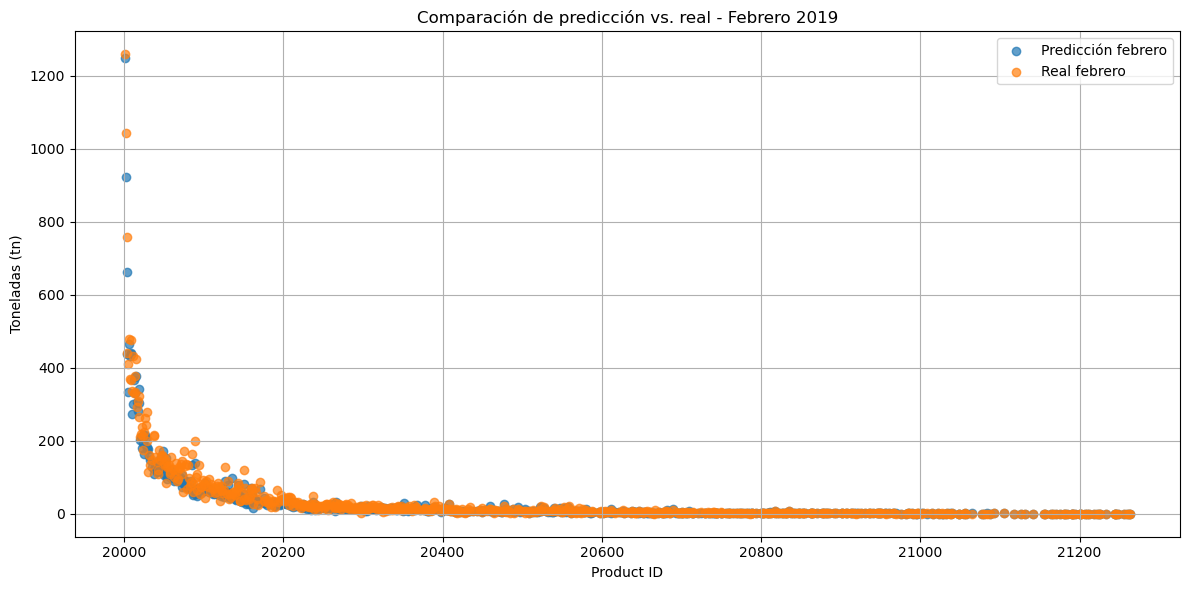

In [89]:
import matplotlib.pyplot as plt

# Volver a cargar el CSV combinado si no está en memoria
comparacion_febrero_path = "predicciones_feb2019_solo.csv"
comparacion_febrero = pd.read_csv(comparacion_febrero_path)

# Unir con los valores reales de febrero 2019
comparacion_febrero = comparacion_febrero.merge(ventas_feb_2019, on="product_id", how="left")

comparacion_febrero = comparacion_febrero.rename(columns={"tn": "tn", "tn_feb_2019": "tn_feb_2019"})
comparacion_febrero.to_csv("comparacion_febrero.csv", index=False)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(comparacion_febrero["product_id"], comparacion_febrero["tn"], label="Predicción febrero", alpha=0.7)
plt.scatter(comparacion_febrero["product_id"], comparacion_febrero["tn_feb_2019"], label="Real febrero", alpha=0.7)
plt.xlabel("Product ID")
plt.ylabel("Toneladas (tn)")
plt.title("Comparación de predicción vs. real - Febrero 2019")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


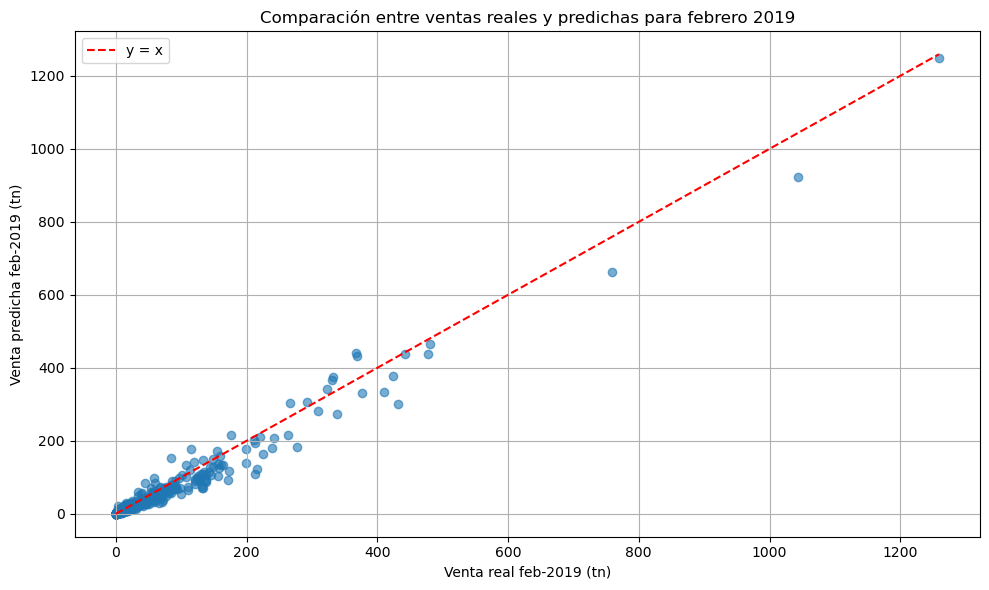

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de comparación
comparacion_febrero = pd.read_csv("comparacion_febrero.csv")

# Crear gráfico tipo scatter con línea de referencia y = x
plt.figure(figsize=(10, 6))

# Puntos reales vs predichos
plt.scatter(comparacion_febrero["tn_feb_2019"], comparacion_febrero["tn"], alpha=0.6)

# Línea ideal y = x
max_val = max(comparacion_febrero["tn_feb_2019"].max(), comparacion_febrero["tn"].max())
plt.plot([0, max_val], [0, max_val], 'r--', label="y = x")

# Etiquetas y detalles
plt.xlabel("Venta real feb-2019 (tn)")
plt.ylabel("Venta predicha feb-2019 (tn)")
plt.title("Comparación entre ventas reales y predichas para febrero 2019")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Archivo exportado: comparacion_febrero_con_errores.csv


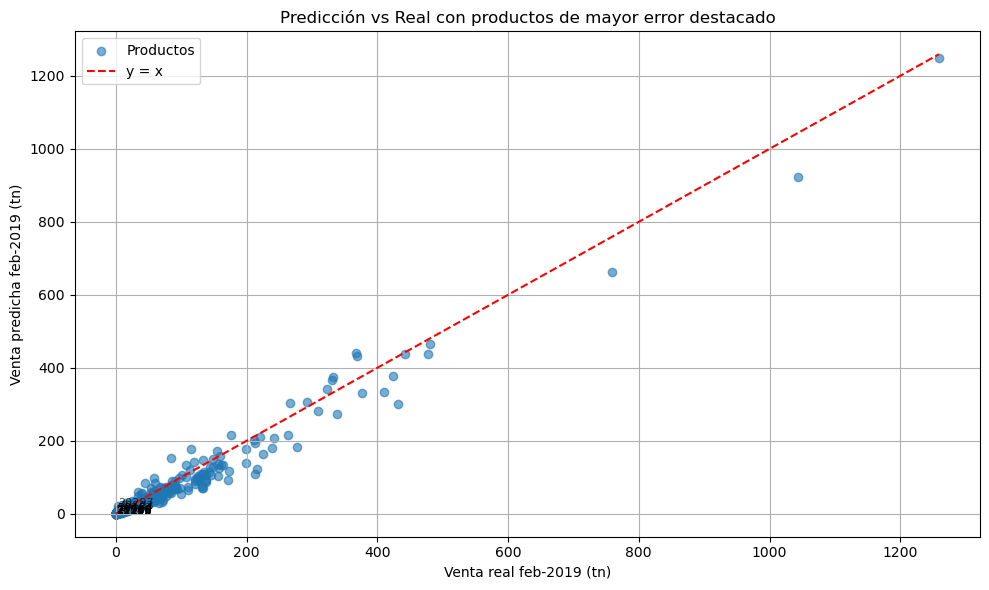

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar la comparación
df = pd.read_csv("comparacion_febrero.csv")

# Calcular errores
df["error_abs"] = (df["tn"] - df["tn_feb_2019"]).abs()
df["error_pct"] = df.apply(
    lambda row: abs(row["tn"] - row["tn_feb_2019"]) / row["tn_feb_2019"] * 100 if row["tn_feb_2019"] != 0 else None,
    axis=1
)

# Ordenar por mayor error porcentual
df_top_errores = df.sort_values(by="error_pct", ascending=False).head(20)

# Guardar comparación extendida
df.to_csv("comparacion_febrero_con_errores.csv", index=False)
print("✅ Archivo exportado: comparacion_febrero_con_errores.csv")

# Gráfico scatter con línea y = x
plt.figure(figsize=(10, 6))
plt.scatter(df["tn_feb_2019"], df["tn"], alpha=0.6, label="Productos")
plt.plot([0, df[["tn", "tn_feb_2019"]].max().max()], [0, df[["tn", "tn_feb_2019"]].max().max()], 'r--', label="y = x")

# Opcional: anotar los puntos con mayor error
for _, row in df_top_errores.iterrows():
    plt.annotate(str(int(row["product_id"])), (row["tn_feb_2019"], row["tn"]), fontsize=8, alpha=0.7)

plt.xlabel("Venta real feb-2019 (tn)")
plt.ylabel("Venta predicha feb-2019 (tn)")
plt.title("Predicción vs Real con productos de mayor error destacado")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
# Asegurate de tener la columna de error absoluto
df = pd.read_csv("comparacion_febrero_con_errores.csv")
df["error_abs"] = (df["tn"] - df["tn_feb_2019"]).abs()

# Ordenar por error absoluto descendente
df_sorted = df.sort_values(by="error_abs", ascending=False)

# Calcular error acumulado y porcentaje del total
total_error = df_sorted["error_abs"].sum()
df_sorted["error_acumulado"] = df_sorted["error_abs"].cumsum()
df_sorted["porc_acumulado"] = df_sorted["error_acumulado"] / total_error

# Seleccionar productos que explican el 80% del desvío
df_pareto_80 = df_sorted[df_sorted["porc_acumulado"] <= 0.80]

# Calcular qué % del total de productos representan
total_productos = df_sorted.shape[0]
productos_80 = df_pareto_80.shape[0]
porcentaje_productos = productos_80 / total_productos * 100

print(f"✅ {productos_80} productos ({porcentaje_productos:.2f}%) generan el 80% del error total.")

# Exportar a CSV si querés
df_pareto_80.to_csv("productos_80_error.csv", index=False)


✅ 141 productos (21.53%) generan el 80% del error total.


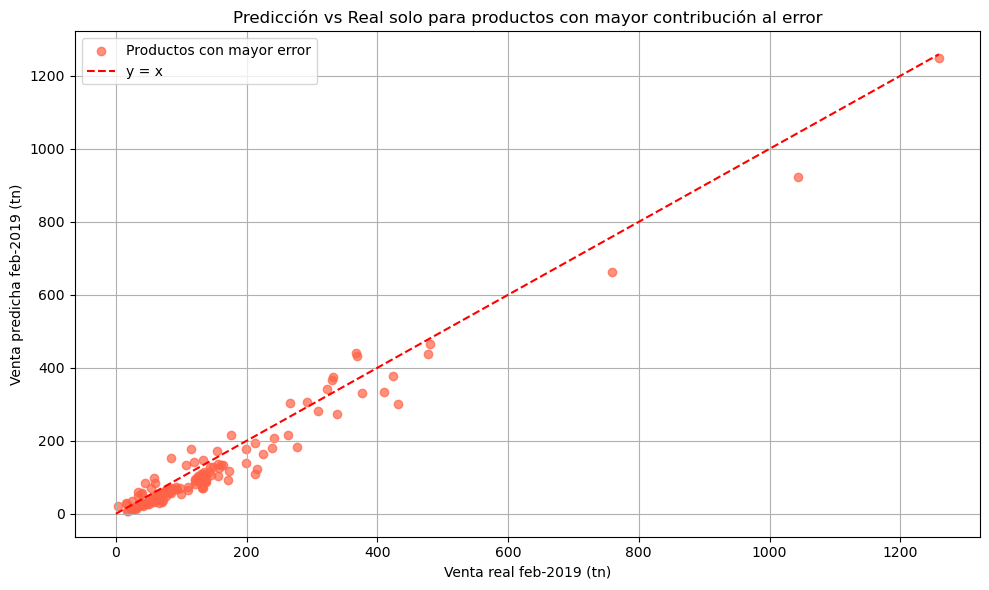

In [94]:
# Cargar el archivo con errores si aún no está cargado
df = pd.read_csv("comparacion_febrero.csv")
df["error_abs"] = abs(df["tn"] - df["tn_feb_2019"])

# Ordenar y calcular error acumulado
df_sorted = df.sort_values(by="error_abs", ascending=False).reset_index(drop=True)
total_error = df_sorted["error_abs"].sum()
df_sorted["error_acumulado"] = df_sorted["error_abs"].cumsum()
df_sorted["porc_error_acumulado"] = df_sorted["error_acumulado"] / total_error

# Filtrar productos que generan el 80% del error
df_top_errores = df_sorted[df_sorted["porc_error_acumulado"] <= 0.80]

# Graficar solo esos productos
plt.figure(figsize=(10, 6))
plt.scatter(df_top_errores["tn_feb_2019"], df_top_errores["tn"], color='tomato', alpha=0.7, label="Productos con mayor error")
plt.plot([0, max(df["tn_feb_2019"].max(), df["tn"].max())],
         [0, max(df["tn_feb_2019"].max(), df["tn"].max())],
         'r--', label="y = x")

plt.xlabel("Venta real feb-2019 (tn)")
plt.ylabel("Venta predicha feb-2019 (tn)")
plt.title("Predicción vs Real solo para productos con mayor contribución al error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


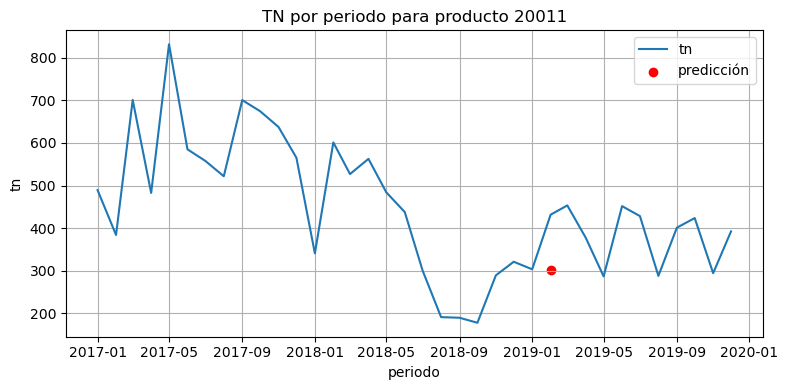

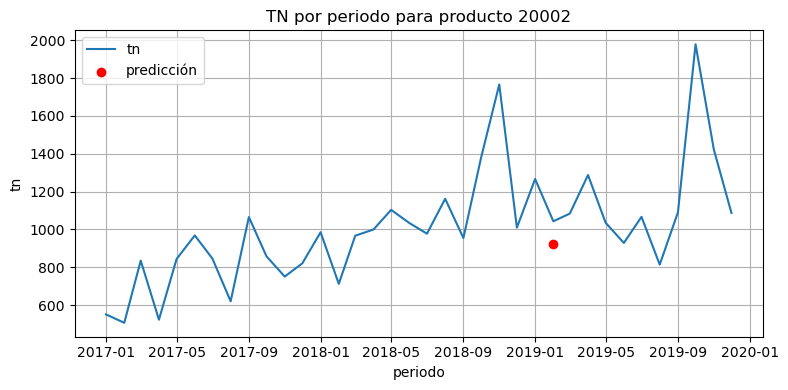

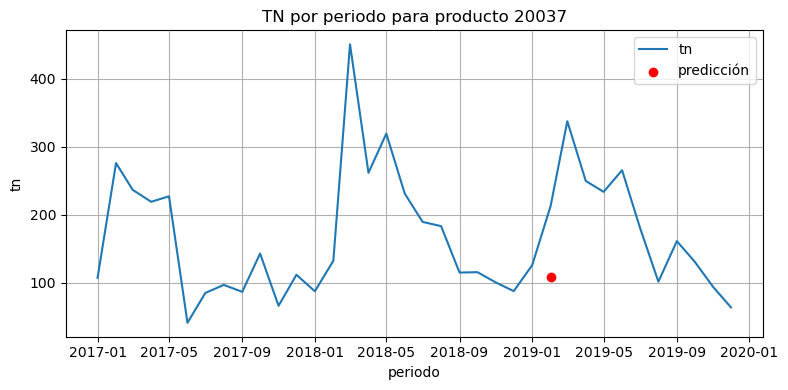

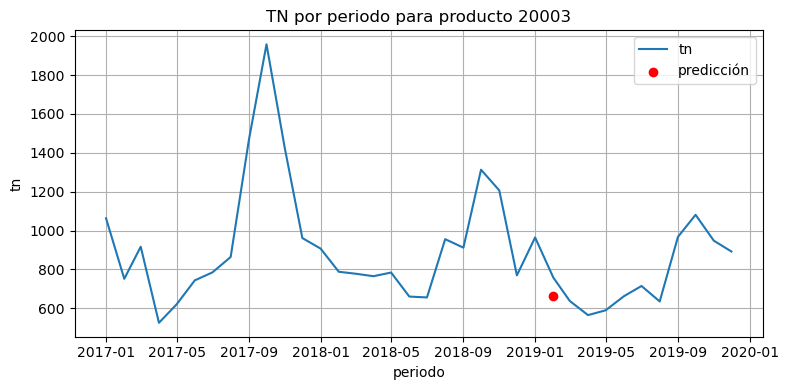

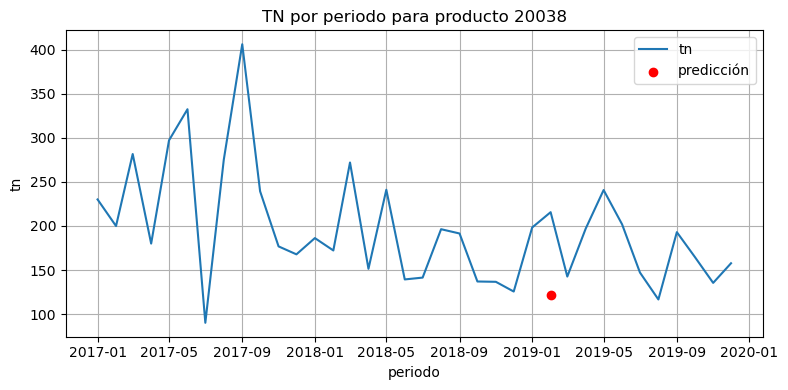

In [96]:
# Reimportar librerías tras el reset
import pandas as pd
import matplotlib.pyplot as plt

# Vuelvo a cargar los archivos necesarios
df_ventas = pd.read_csv("comparacion_febrero.csv")
df_ventas["error_abs"] = abs(df_ventas["tn"] - df_ventas["tn_feb_2019"])

df_sellin = pd.read_csv("sell-in.txt", sep="\t")
df_sellin["periodo"] = pd.to_datetime(df_sellin["periodo"], format="%Y%m")

# Seleccionar productos que generan el 80% del error acumulado
df_sorted = df_ventas.sort_values(by="error_abs", ascending=False).reset_index(drop=True)
total_error = df_sorted["error_abs"].sum()
df_sorted["error_acumulado"] = df_sorted["error_abs"].cumsum()
df_sorted["porc_error_acumulado"] = df_sorted["error_acumulado"] / total_error
productos_top_error = df_sorted[df_sorted["porc_error_acumulado"] <= 0.80]["product_id"].unique()

# Graficar solo los primeros 5 para muestra
graficos_generados = []

for product_id in productos_top_error[:5]:
    df_producto = df_sellin[df_sellin["product_id"] == product_id]
    serie = df_producto.groupby("periodo")["tn"].sum().sort_index()

    # Obtener predicción
    pred_row = df_ventas[df_ventas["product_id"] == product_id]
    pred = pred_row["tn"].values[0] if not pred_row.empty else None

    # Crear gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(serie.index, serie.values, label="tn")
    if pred is not None:
        plt.scatter(pd.to_datetime("2019-02-01"), pred, color='red', label="predicción")
    plt.title(f"TN por periodo para producto {product_id}")
    plt.xlabel("periodo")
    plt.ylabel("tn")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


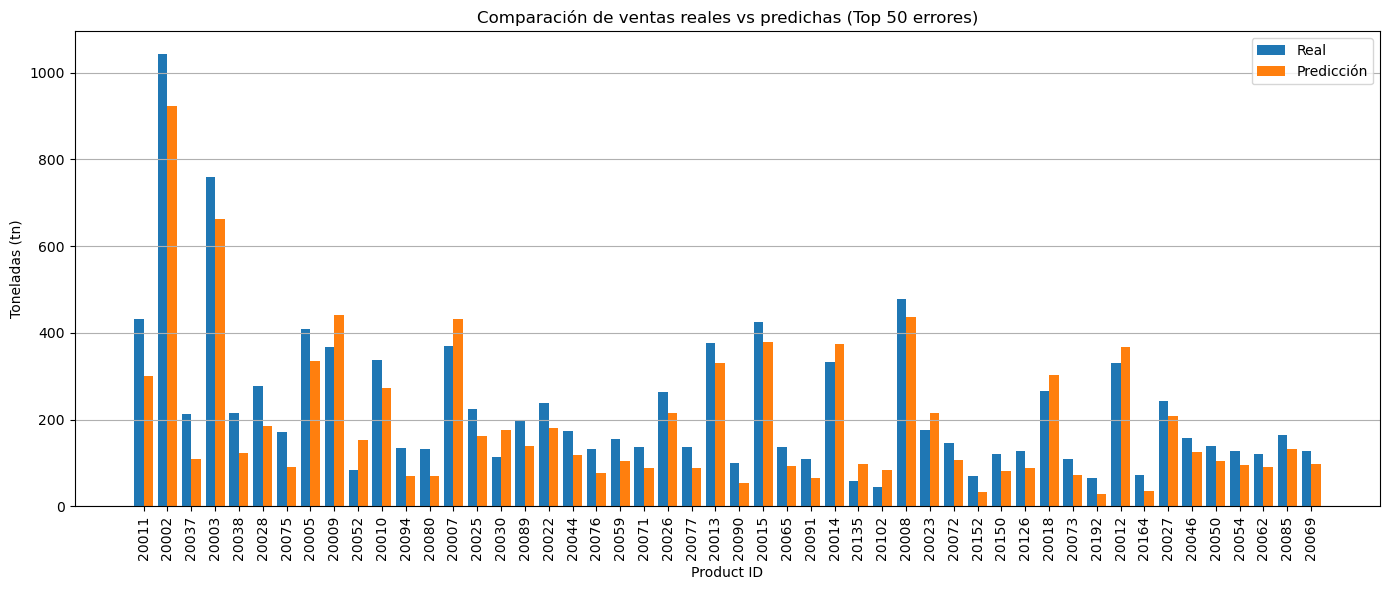

In [97]:


# Cargar archivo con comparación predicción vs real
df = pd.read_csv("comparacion_febrero.csv")

# Calcular error absoluto y ordenar
df["error_abs"] = abs(df["tn"] - df["tn_feb_2019"])
df_top50 = df.sort_values(by="error_abs", ascending=False).head(50)

# Crear gráfico de barras agrupadas
plt.figure(figsize=(14, 6))
x = range(len(df_top50))
bar_width = 0.4

plt.bar(x, df_top50["tn_feb_2019"], width=bar_width, label="Real", align="center")
plt.bar([i + bar_width for i in x], df_top50["tn"], width=bar_width, label="Predicción", align="center")

plt.xticks([i + bar_width / 2 for i in x], df_top50["product_id"], rotation=90)
plt.xlabel("Product ID")
plt.ylabel("Toneladas (tn)")
plt.title("Comparación de ventas reales vs predichas (Top 50 errores)")
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


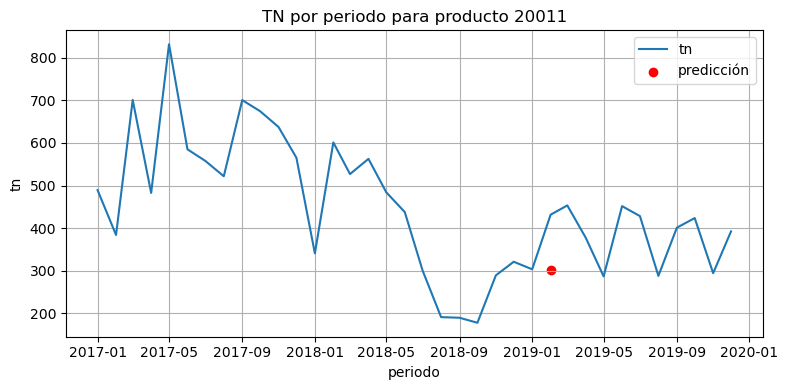

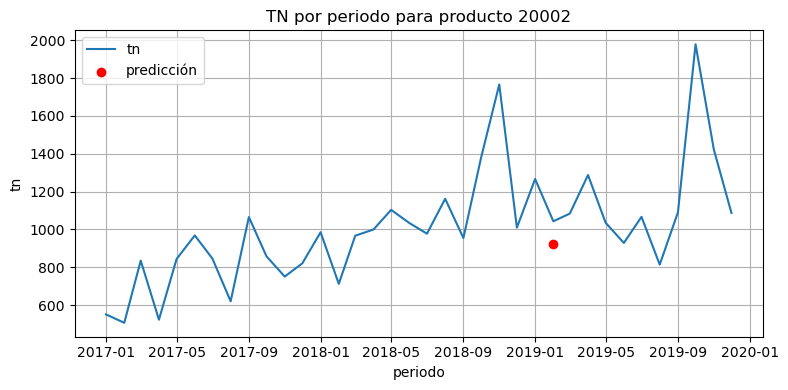

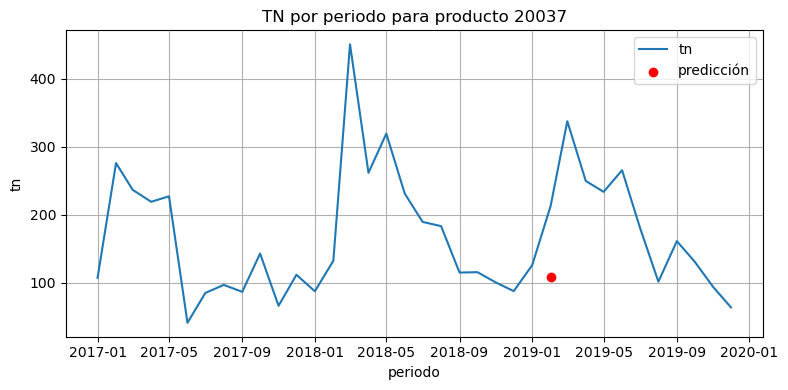

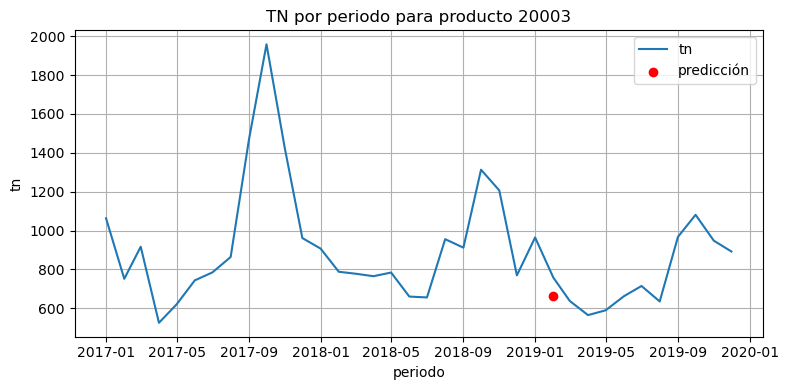

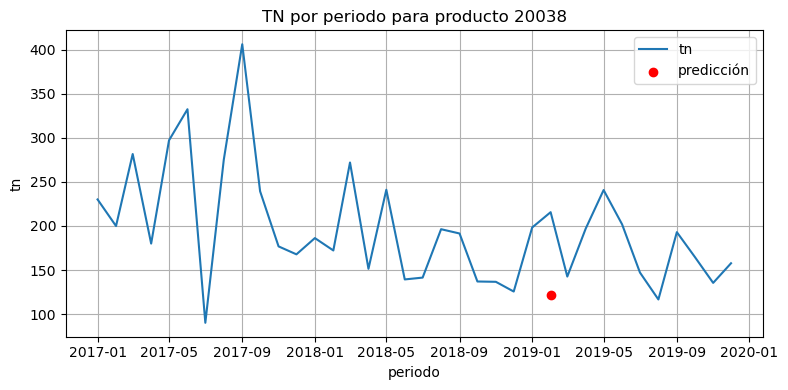

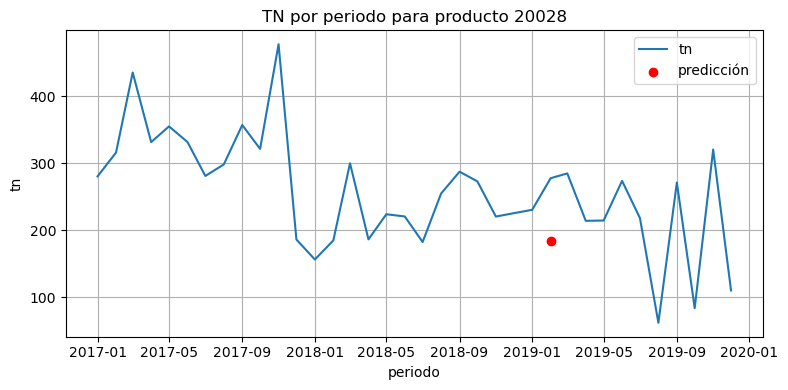

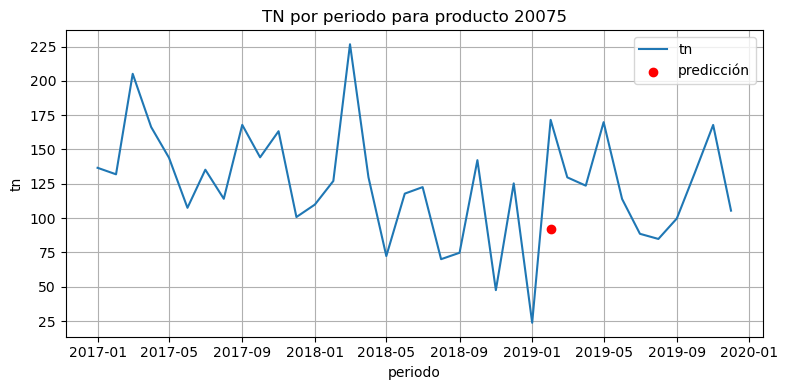

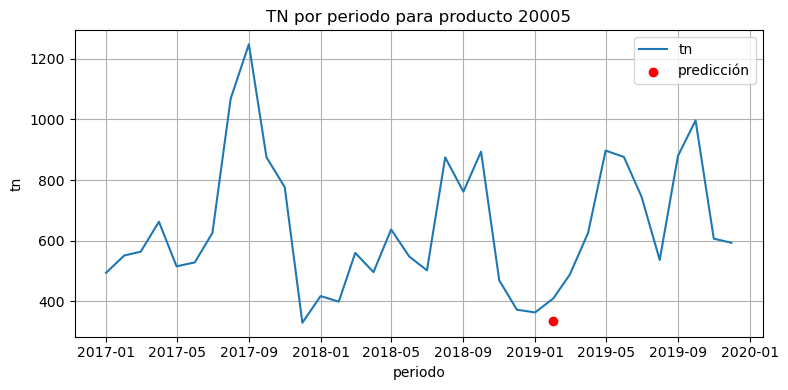

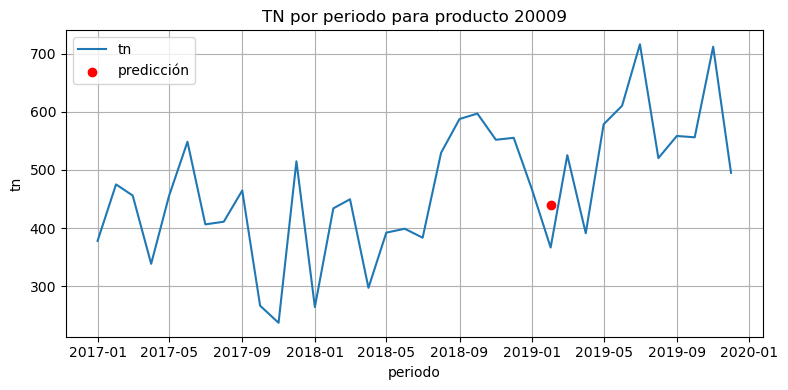

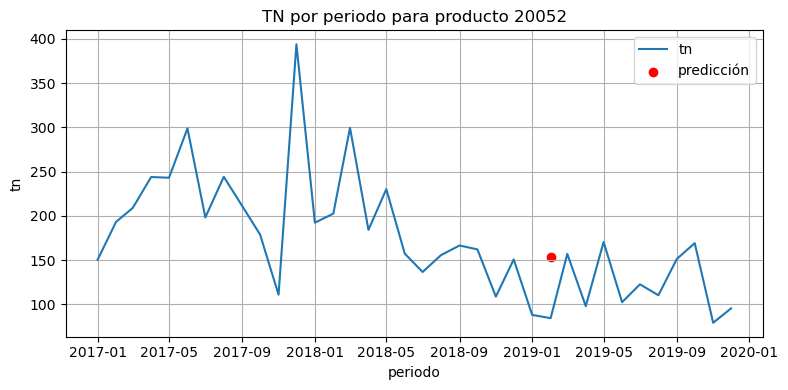

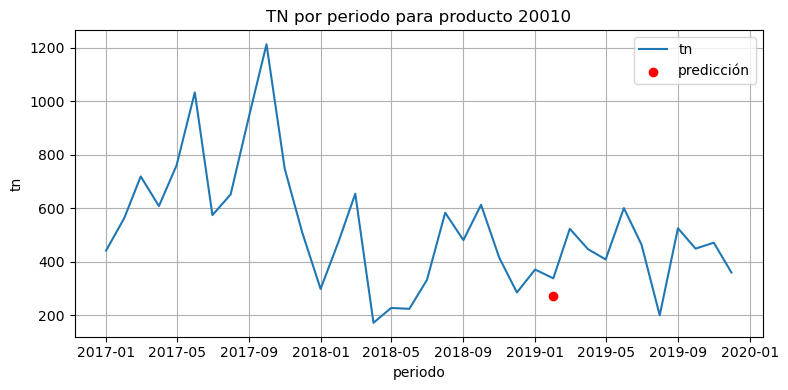

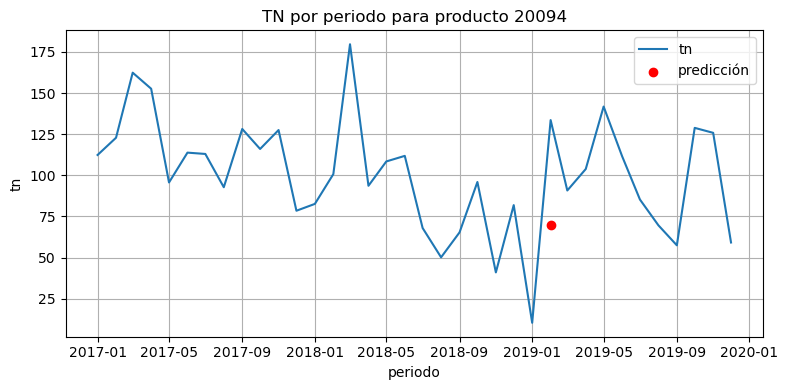

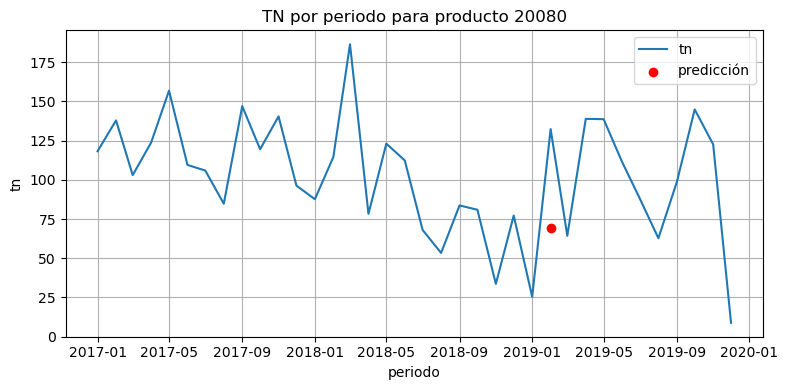

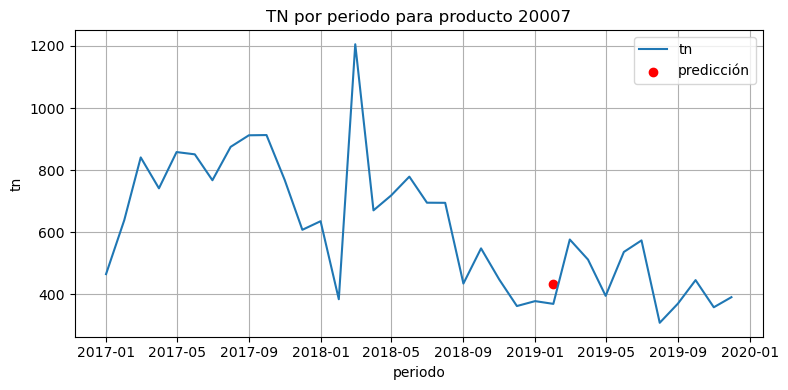

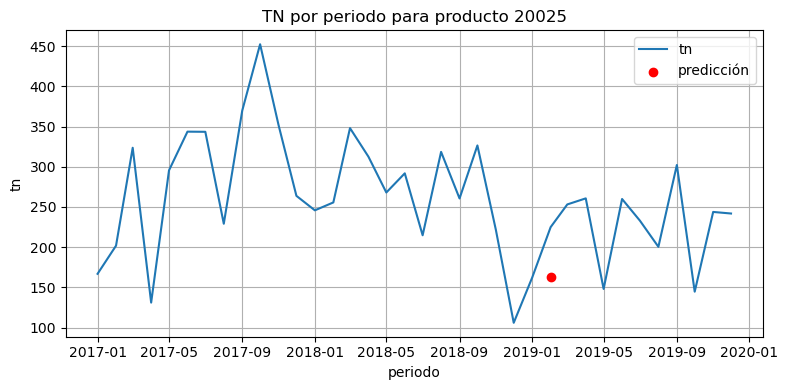

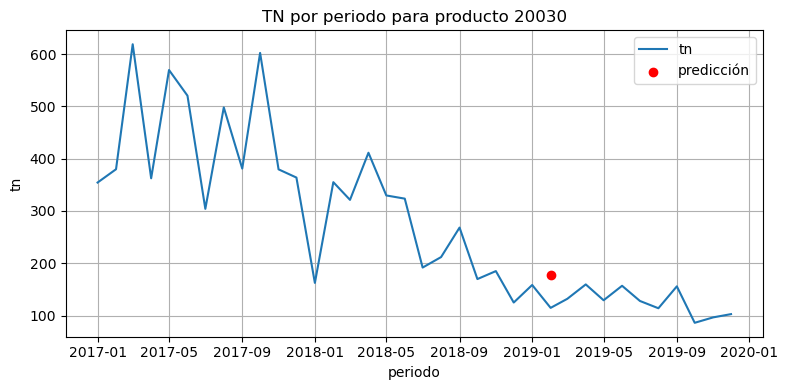

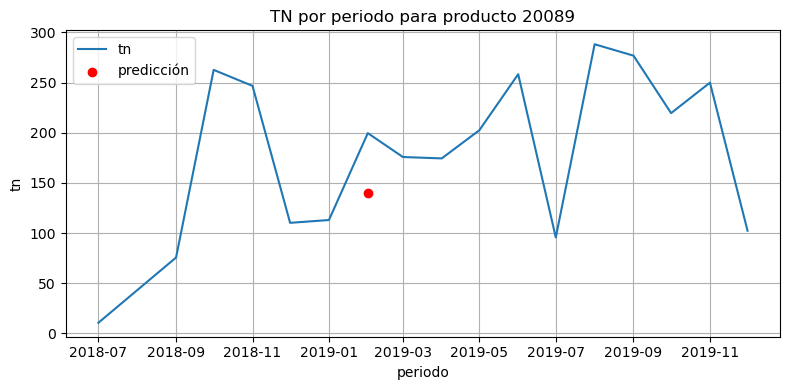

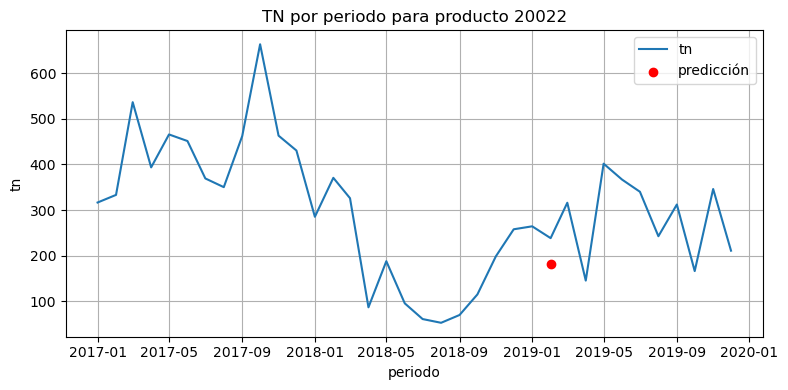

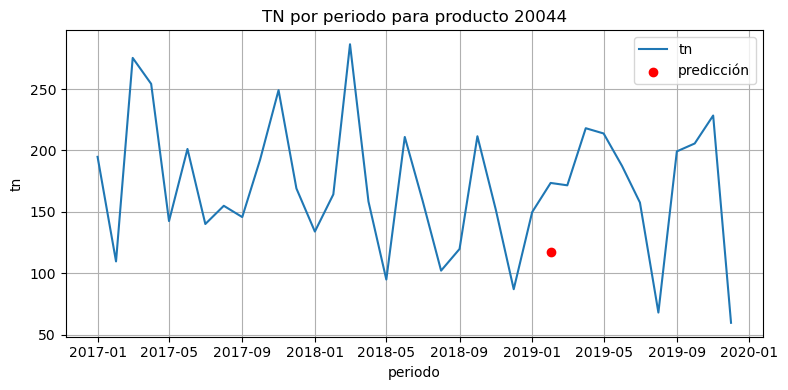

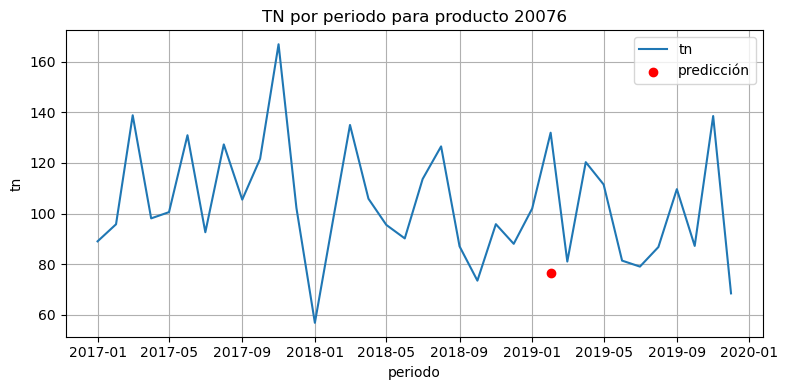

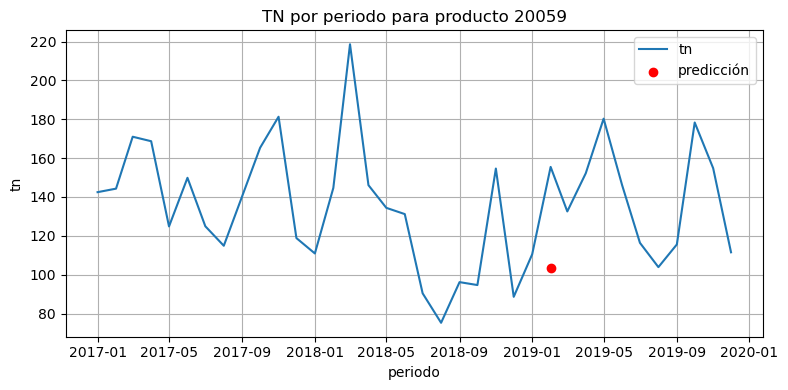

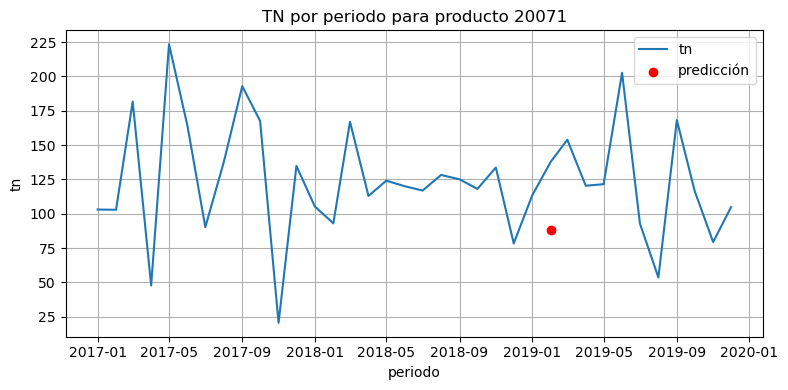

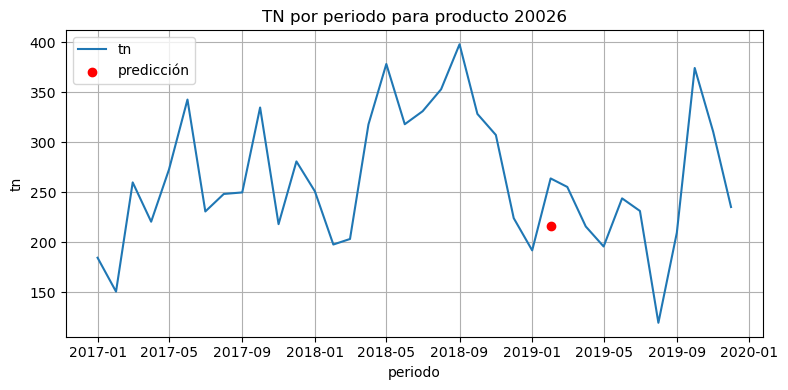

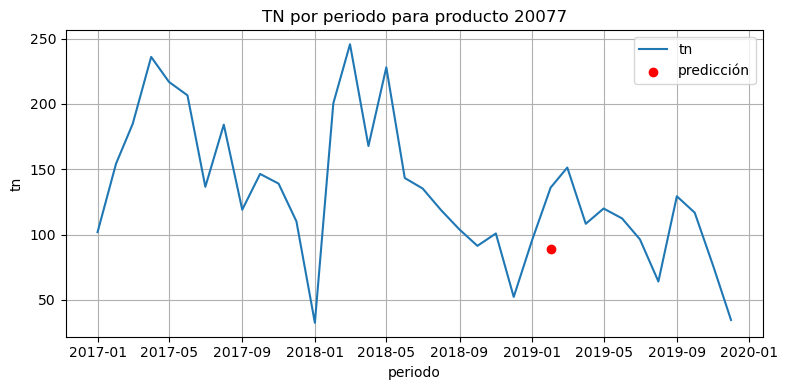

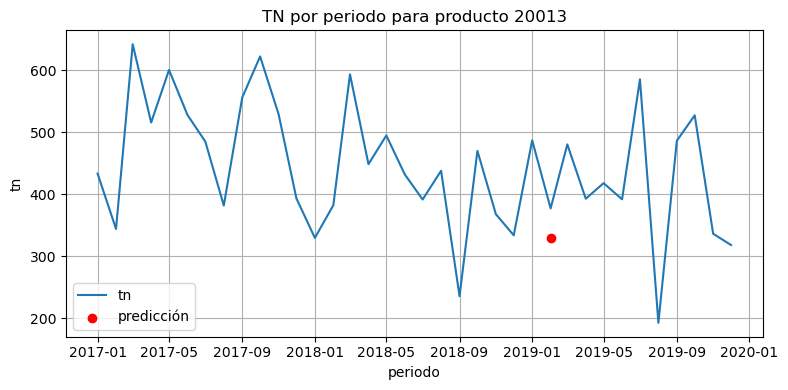

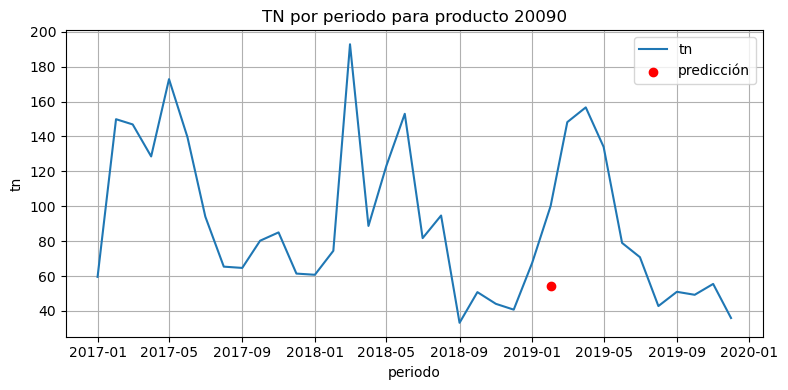

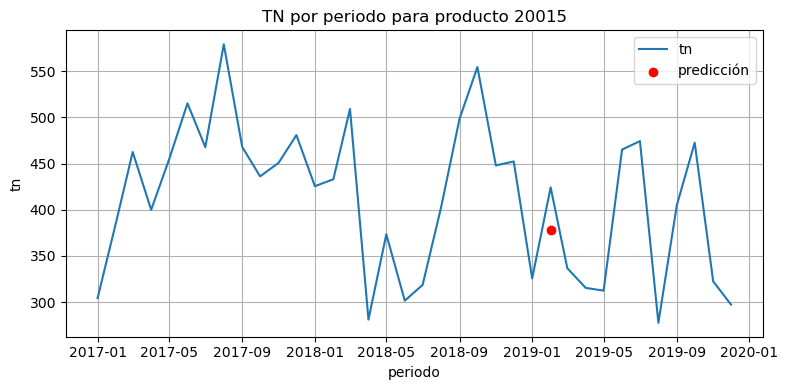

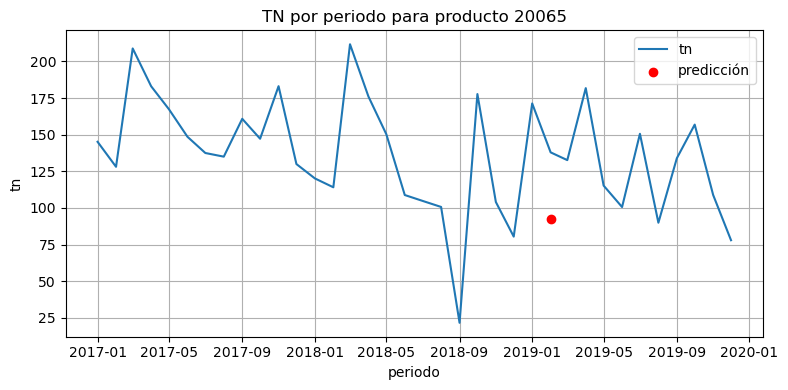

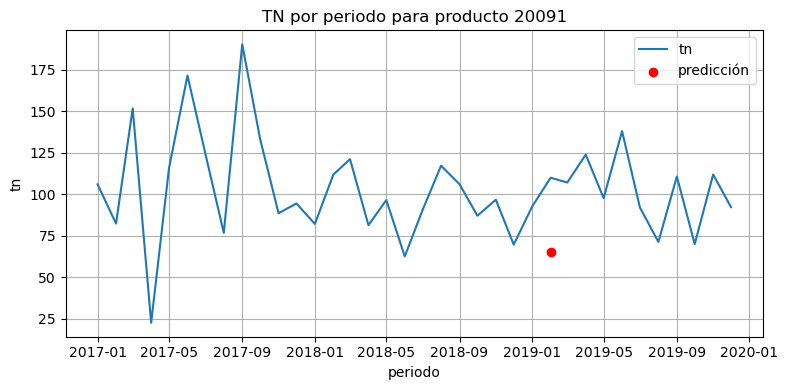

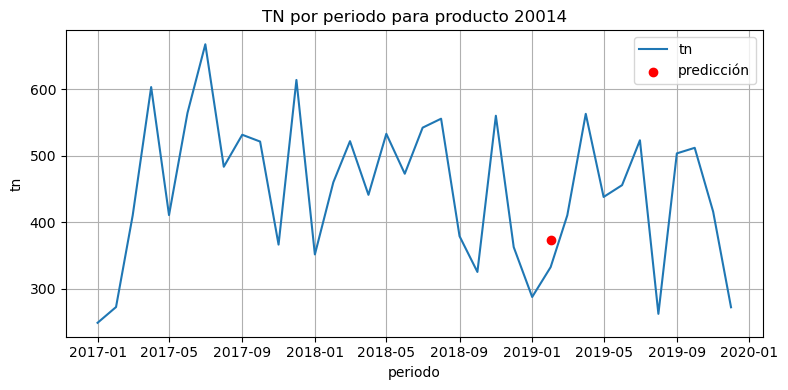

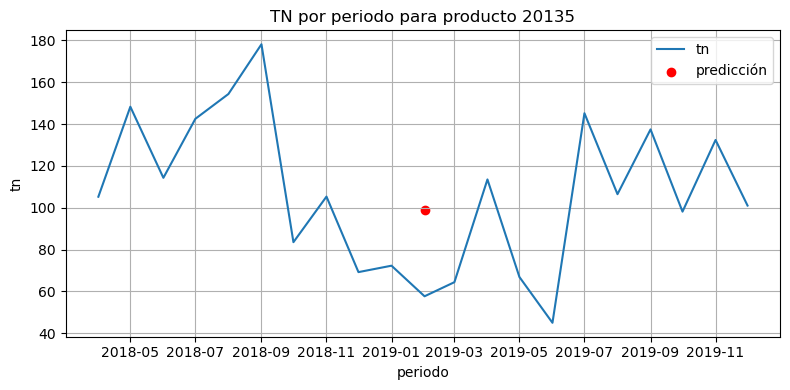

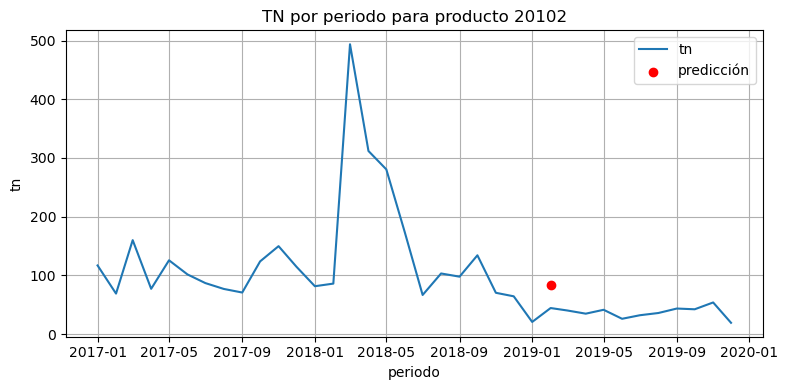

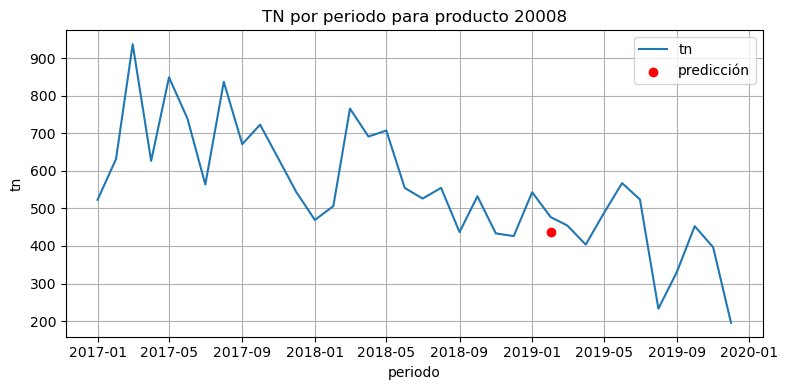

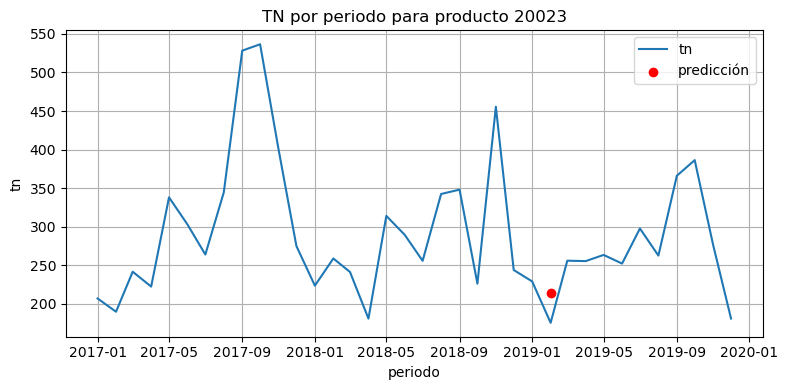

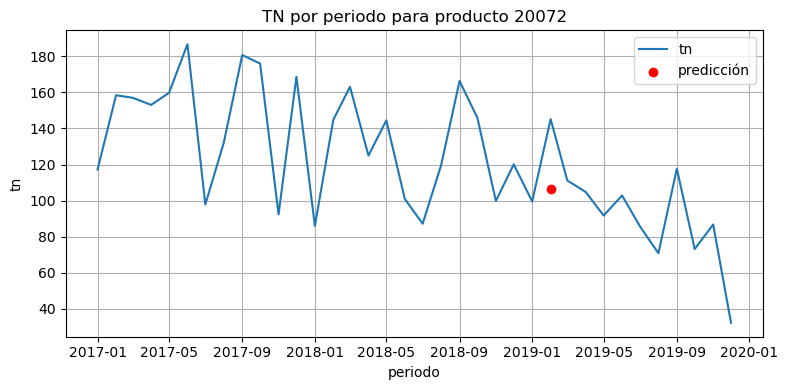

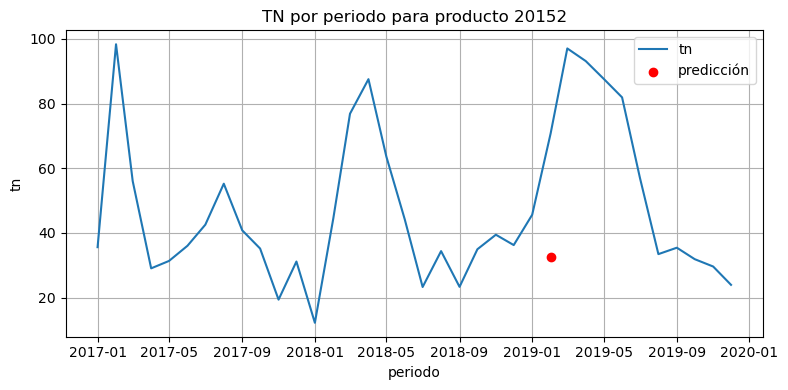

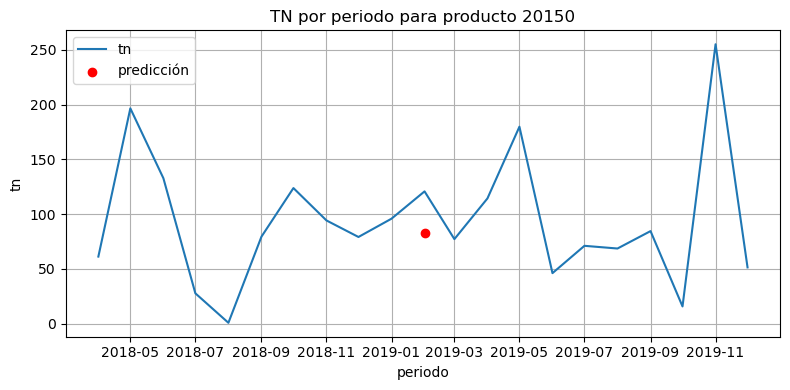

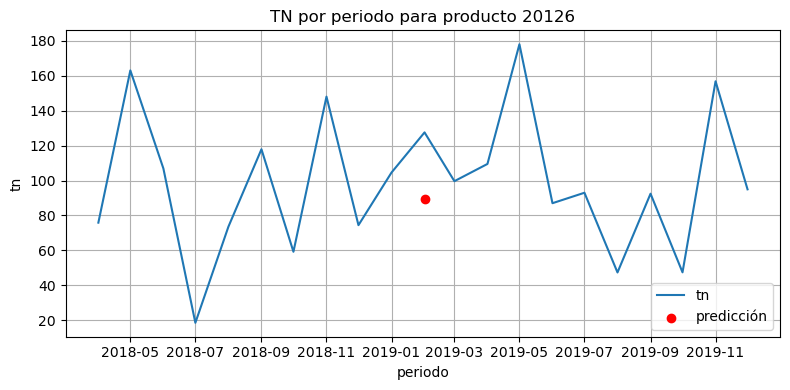

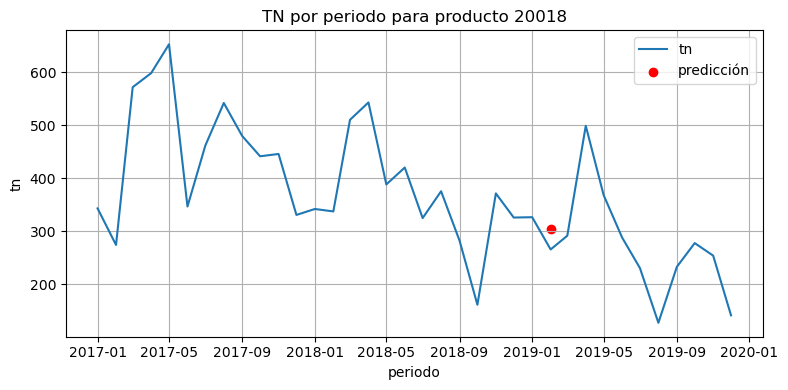

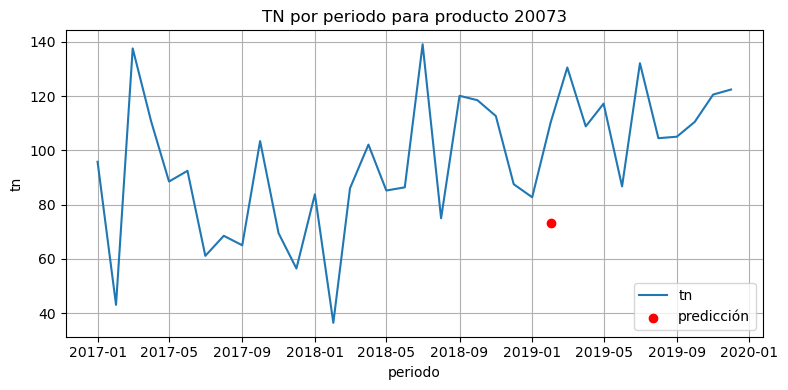

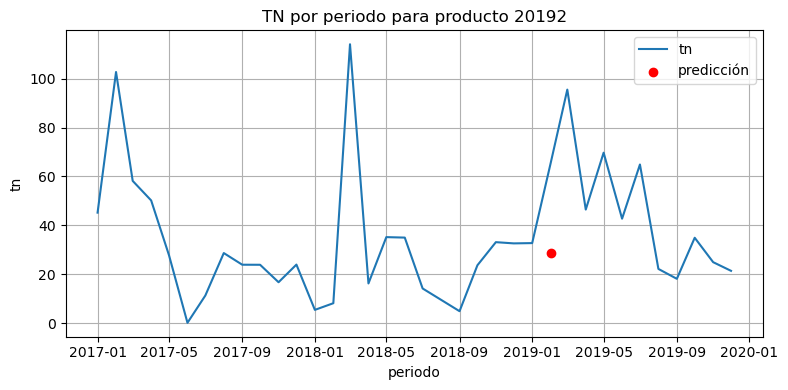

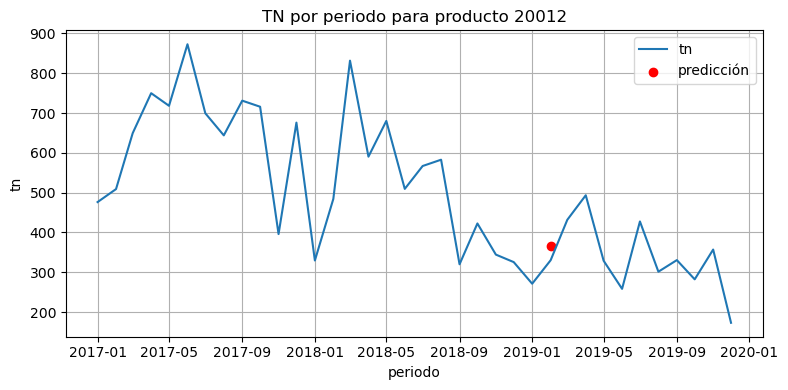

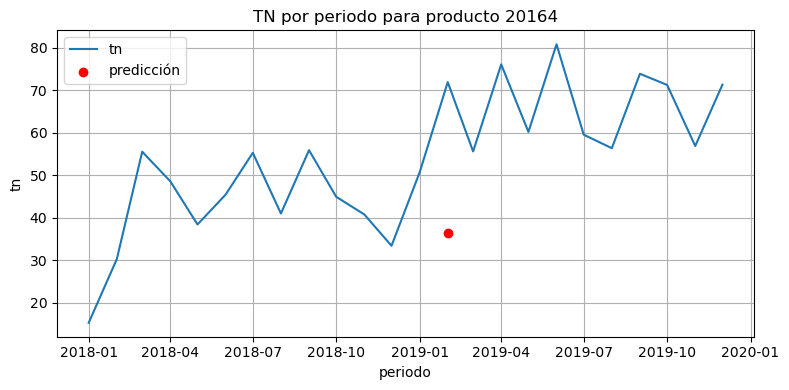

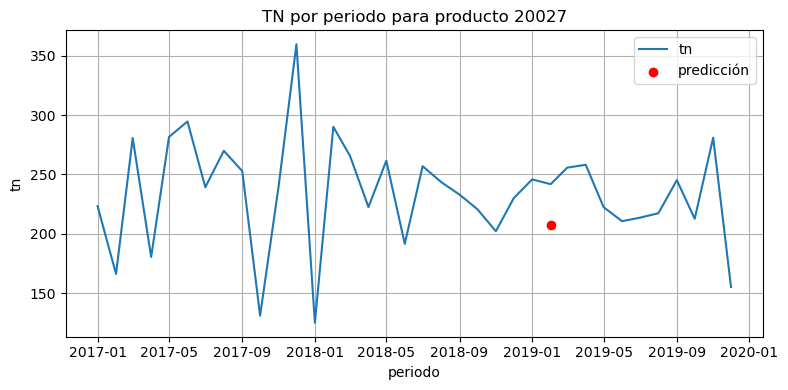

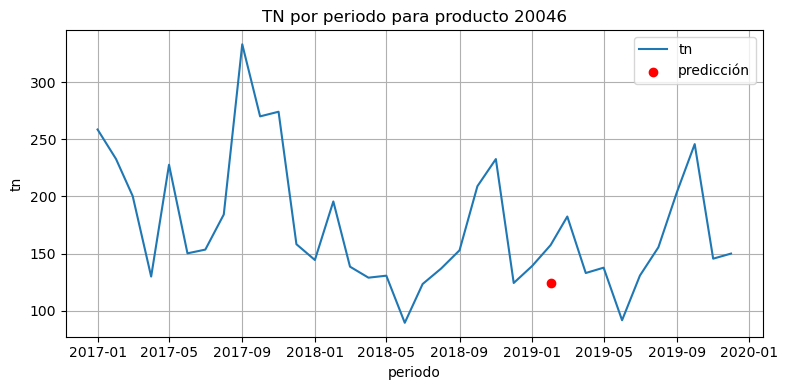

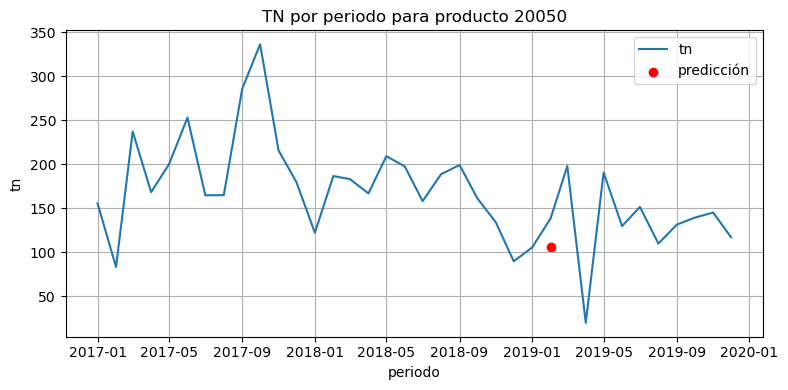

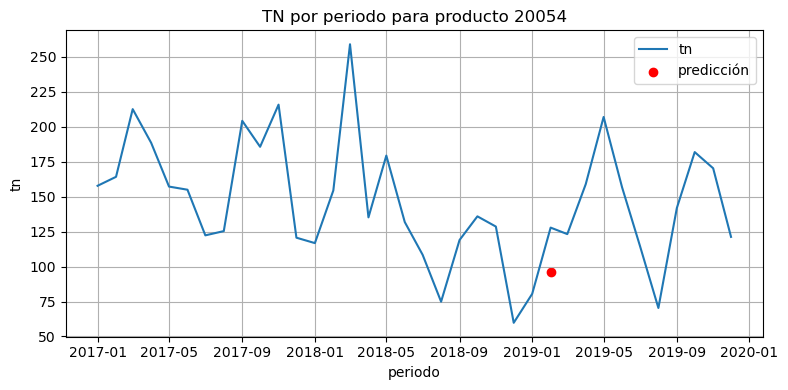

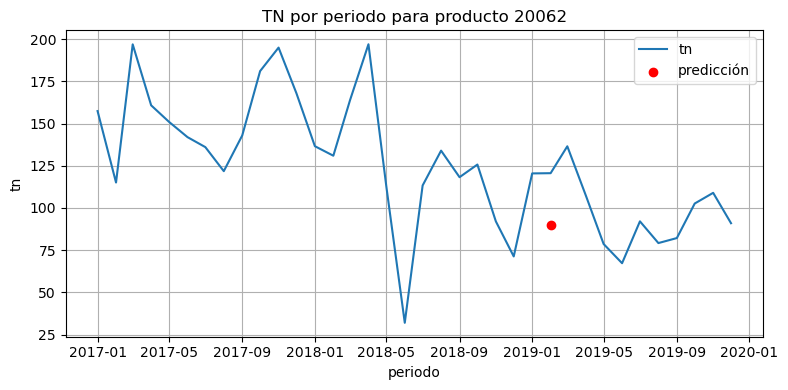

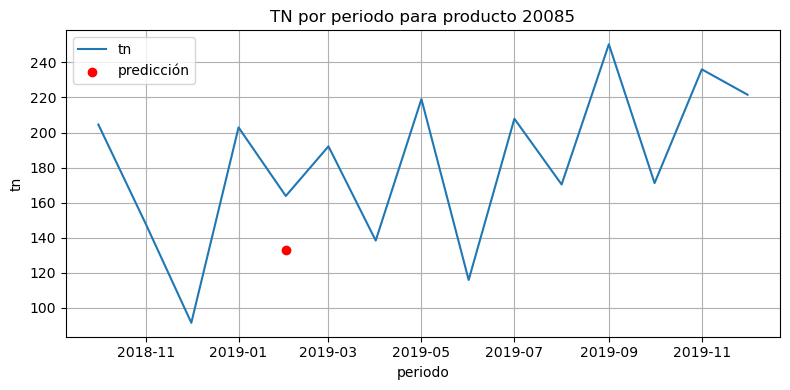

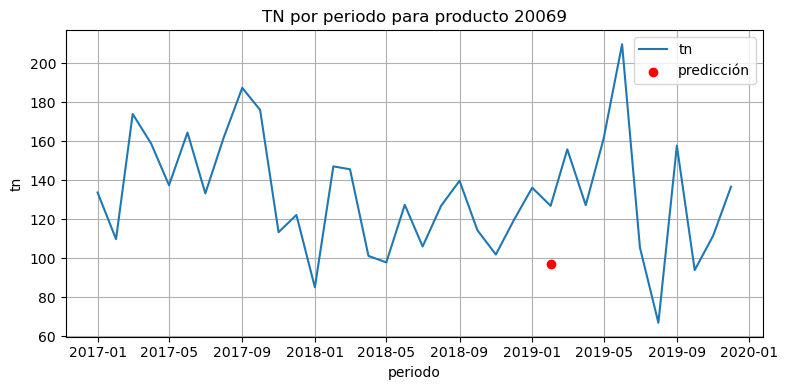

In [98]:
# Cargar los datos necesarios
#df_ventas = pd.read_csv("comparacion_diciembre.csv")
df_pred_80 = pd.read_csv("productos_80_error.csv")
df_sellin = pd.read_csv("sell-in.txt", sep="\t")
df_sellin["periodo"] = pd.to_datetime(df_sellin["periodo"], format="%Y%m")

# Lista de productos con mayor error
productos_top_error = df_pred_80["product_id"].unique()

# Graficar los primeros 50 como muestra
for product_id in productos_top_error[:50]:
    df_producto = df_sellin[df_sellin["product_id"] == product_id]
    serie = df_producto.groupby("periodo")["tn"].sum().sort_index()

    # Obtener predicción
    pred_row = df_ventas[df_ventas["product_id"] == product_id]
    pred = pred_row["tn"].values[0] if not pred_row.empty else None

    # Crear gráfico
    plt.figure(figsize=(8, 4))
    plt.plot(serie.index, serie.values, label="tn")
    if pred is not None:
        plt.scatter(pd.to_datetime("2019-02-01"), pred, color='red', label="predicción")
    plt.title(f"TN por periodo para producto {product_id}")
    plt.xlabel("periodo")
    plt.ylabel("tn")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
